**Tugas Building, Tuning, dan Deploying Model Machine Learning**



**Nama**: Ilham Akbar

**NIM**: 4112322005

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("/content/loan_approval_dataset.csv")


Data Overview:
   Age  Income Education_Level  Credit_Score  Loan_Amount Loan_Purpose  \
0   56   24000             PhD           333        26892     Personal   
1   46   90588          Master           316        26619         Home   
2   32  113610             PhD           452         1281     Personal   
3   60  117856     High School           677        28420     Personal   
4   25   58304             PhD           641        16360          Car   

   Loan_Approval  
0              0  
1              1  
2              1  
3              0  
4              0  

Missing Values:
Age                0
Income             0
Education_Level    0
Credit_Score       0
Loan_Amount        0
Loan_Purpose       0
Loan_Approval      0
dtype: int64


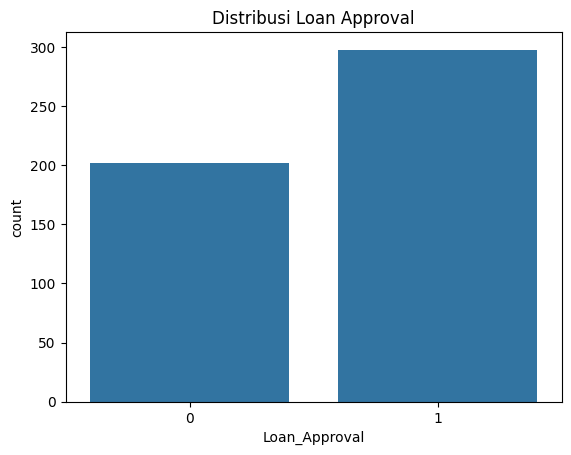

In [2]:
# 1. Eksplorasi Data
print("\nData Overview:")
print(df.head())
print("\nMissing Values:")
print(df.isnull().sum())

# Visualisasi distribusi target
sns.countplot(x='Loan_Approval', data=df)
plt.title("Distribusi Loan Approval")
plt.show()

In [3]:
# 2. Pemrosesan Data
# Mengisi missing values (misalnya dengan median untuk numerik, modus untuk kategori)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Encoding fitur kategorikal
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Pisahkan fitur dan target
X = df.drop(columns=['Loan_Approval'])
y = df['Loan_Approval']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<ipython-input-3-e39e95b2b1fe>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-3-e39e95b2b1fe>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [4]:
# 3. Pemilihan dan Training Model

# Model 1: Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Model 2: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)


Evaluasi Model: Logistic Regression
Accuracy: 0.6400
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.03      0.05        37
           1       0.64      1.00      0.78        63

    accuracy                           0.64       100
   macro avg       0.82      0.51      0.42       100
weighted avg       0.77      0.64      0.51       100



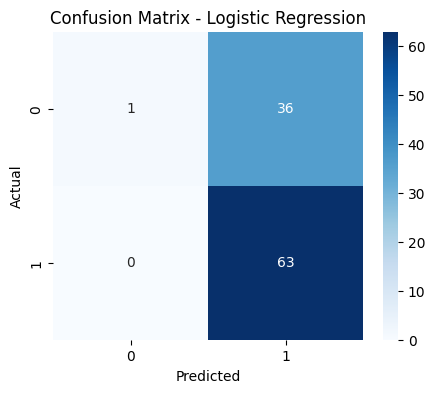


Evaluasi Model: Random Forest
Accuracy: 0.5100
Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.24      0.27        37
           1       0.60      0.67      0.63        63

    accuracy                           0.51       100
   macro avg       0.45      0.45      0.45       100
weighted avg       0.49      0.51      0.50       100



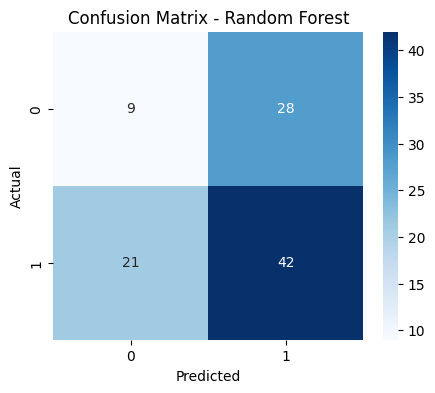

(0.51,
 '              precision    recall  f1-score   support\n\n           0       0.30      0.24      0.27        37\n           1       0.60      0.67      0.63        63\n\n    accuracy                           0.51       100\n   macro avg       0.45      0.45      0.45       100\nweighted avg       0.49      0.51      0.50       100\n')

In [16]:
# 4. Evaluasi Model
def evaluate_model(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\nEvaluasi Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", class_report)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return accuracy, class_report

# Evaluasi sebelum tuning
accuracy_before, report_before = evaluate_model(log_reg, "Logistic Regression", X_test, y_test)

evaluate_model(rf, "Random Forest", X_test, y_test)

# Berdasarkan Confusion matrix ditentukanlah model terbaik yang akan dilanjutkan pada analisis Tuning selanjutnya
# Model terbaik (Logistic Regression)


In [17]:
# Model Logistic Regression akan dilanjutkan ke tahap analisis Tuning
# 5. Hyperparameter Tuning dengan Grid Search untuk Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
gs = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
gs.fit(X_train, y_train)
print("Best Parameters for Logistic Regression:", gs.best_params_)

Best Parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}



Evaluasi Model: Tuned Logistic Regression
Accuracy: 0.6300
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.63      1.00      0.77        63

    accuracy                           0.63       100
   macro avg       0.32      0.50      0.39       100
weighted avg       0.40      0.63      0.49       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


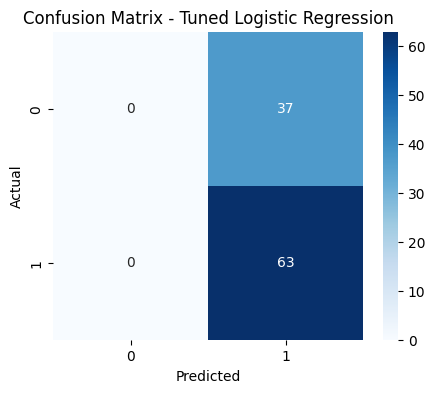


================== Perbandingan Performa Sebelum & Sesudah Tuning ==================
Accuracy Sebelum Tuning: 0.6400
Accuracy Setelah Tuning: 0.6300

Classification Report Sebelum Tuning:
               precision    recall  f1-score   support

           0       1.00      0.03      0.05        37
           1       0.64      1.00      0.78        63

    accuracy                           0.64       100
   macro avg       0.82      0.51      0.42       100
weighted avg       0.77      0.64      0.51       100


Classification Report Setelah Tuning:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.63      1.00      0.77        63

    accuracy                           0.63       100
   macro avg       0.32      0.50      0.39       100
weighted avg       0.40      0.63      0.49       100



In [18]:
# 6. Evaluasi Model Setelah Tuning
best_log_reg = gs.best_estimator_
accuracy_after, report_after = evaluate_model(best_log_reg, "Tuned Logistic Regression", X_test, y_test)

# Perbandingan Performa Sebelum dan Sesudah Tuning
print("\n================== Perbandingan Performa Sebelum & Sesudah Tuning ==================")
print(f"Accuracy Sebelum Tuning: {accuracy_before:.4f}")
print(f"Accuracy Setelah Tuning: {accuracy_after:.4f}")
print("\nClassification Report Sebelum Tuning:\n", report_before)
print("\nClassification Report Setelah Tuning:\n", report_after)
print("=================================================================================")